### 1. 단층 신경망을 통하여 Logical OR 연산 구현

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

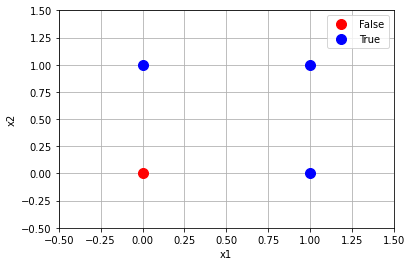

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

plt.plot(X[0, 0], X[0, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'b.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def binary_classifier(x, theta):
    z = x.dot(theta)
    p_hat = sigmoid(z)
    y_hat = (p_hat >= 0.5).astype(int)
    return y_hat

In [7]:
X_ = np.c_[np.ones(X.shape[0]), X]
print(X_)
print(Y)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
[[0]
 [1]
 [1]
 [1]]


In [8]:
eta = 0.1
n_iterations = 1000
(m, n) = X_.shape
theta = np.random.rand(n, 1)

for i in tqdm(range(n_iterations)):
    P_hat = sigmoid(X_.dot(theta))
    gradients = 2/m * X_.T.dot(P_hat - Y)
    theta -= eta * gradients

100%|██████████| 1000/1000 [00:00<00:00, 76920.19it/s]


In [9]:
Y_hat = binary_classifier(X_, theta)
print(Y_hat.T)
print(Y.T)

[[0 1 1 1]]
[[0 1 1 1]]


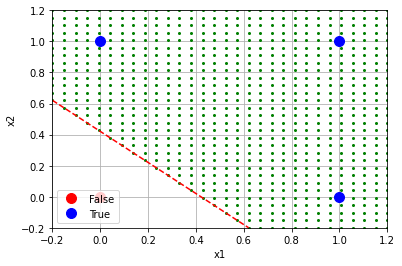

In [10]:
num_of_samples = 30
(m, n) = X_.shape # m : num of data / n : dim of data

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = 1
    X_new[i*num_of_samples + j, 1] = x1[i]
    X_new[i*num_of_samples + j, 2] = x2[j]

Y_hat = binary_classifier(X_new, theta)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
plt.plot(X_new[Y_hat == 1][:, 1], X_new[Y_hat == 1][:, 2], 'g.', markersize = 4)

idx1 = np.where(X_new[Y_hat == 1][:, 1] == min(X_new[Y_hat == 1][:, 1]))[0][0]
idx2 = np.where(X_new[Y_hat == 1][:, 1] == max(X_new[Y_hat == 1][:, 1]))[0][0]
plt.plot([X_new[Y_hat == 1][:, 1][idx1], X_new[Y_hat == 1][:, 2][idx1]], [X_new[Y_hat == 1][:, 2][idx1], X_new[Y_hat == 1][:, 1][idx1]], 'r--')

plt.plot(X[0, 0], X[0, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'b.', markersize=20, label = "True")

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()